In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
data = pd.read_csv("housing.csv")

In [100]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Data Exploration

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The `total_bedrooms` column has some missing entries. So, we'll drop the rows where the entries are missing.
* data.dropna() - drops the rows with null entries and returns the new dataset
* data.dropna(inplace=True) - drops the rows with null entries from the original dataset object i.e `data`

In [102]:
data.dropna(inplace=True) 

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


The `ocean_proximity` feature is of string datatype, so we'll exclude it for now for visualizing the data

In [104]:
data.columns
print(data.columns)
numerical_columns = data.select_dtypes(include=["float64","int64"]).columns
print(numerical_columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


The *target* variable in this dataset is `median_house_value` since the value is what the model is going to predict.

The rest of the variables are *features*
* X - Features
* y - Target

In [105]:
from sklearn.model_selection import train_test_split
X=data.drop(["median_house_value"],axis=1)
y=data["median_house_value"]

The `train_test_split` function splits the entire dataset into two parts. That are obviously for training and testing respectively.

The idea is to train the model on a certain set of examples. Once the model is trained, it is to be tested on completely new set of examples.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [107]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3022,-119.45,35.16,34.0,3437.0,696.0,1783.0,608.0,2.3912,INLAND,52900.0
18824,-121.93,41.86,28.0,4225.0,835.0,1908.0,686.0,1.7400,INLAND,44000.0
2765,-115.90,32.69,18.0,414.0,86.0,98.0,54.0,1.5417,INLAND,57500.0
19828,-119.39,36.55,30.0,1669.0,314.0,837.0,325.0,3.3869,INLAND,80400.0
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,NEAR BAY,460000.0
...,...,...,...,...,...,...,...,...,...,...
6979,-118.02,33.97,34.0,1903.0,293.0,887.0,306.0,6.1480,<1H OCEAN,313800.0
11522,-118.08,33.72,14.0,2021.0,396.0,696.0,367.0,7.1673,NEAR OCEAN,340700.0
10873,-117.90,33.73,31.0,1171.0,306.0,1690.0,301.0,3.2639,<1H OCEAN,155200.0
20360,-118.94,34.17,16.0,3746.0,508.0,1556.0,452.0,6.3303,<1H OCEAN,299400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

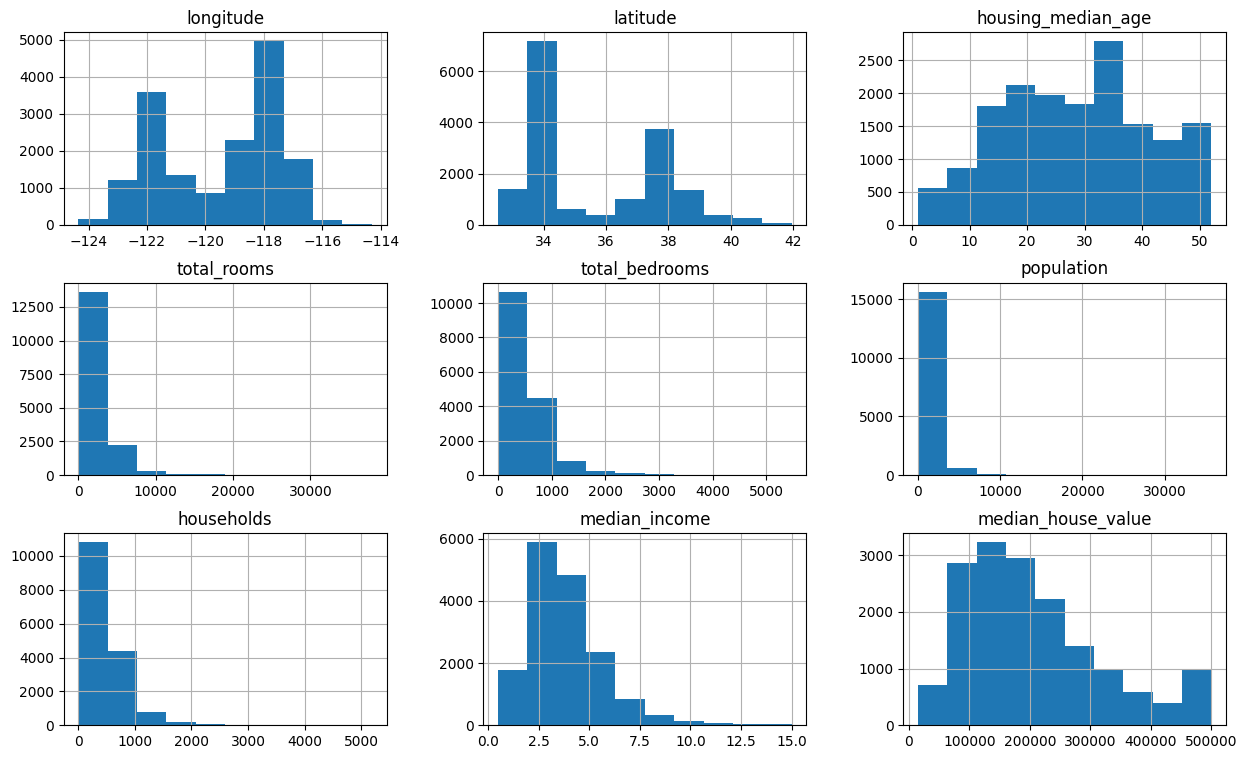

In [108]:
train_data.hist(figsize=(15,9))

<Axes: >

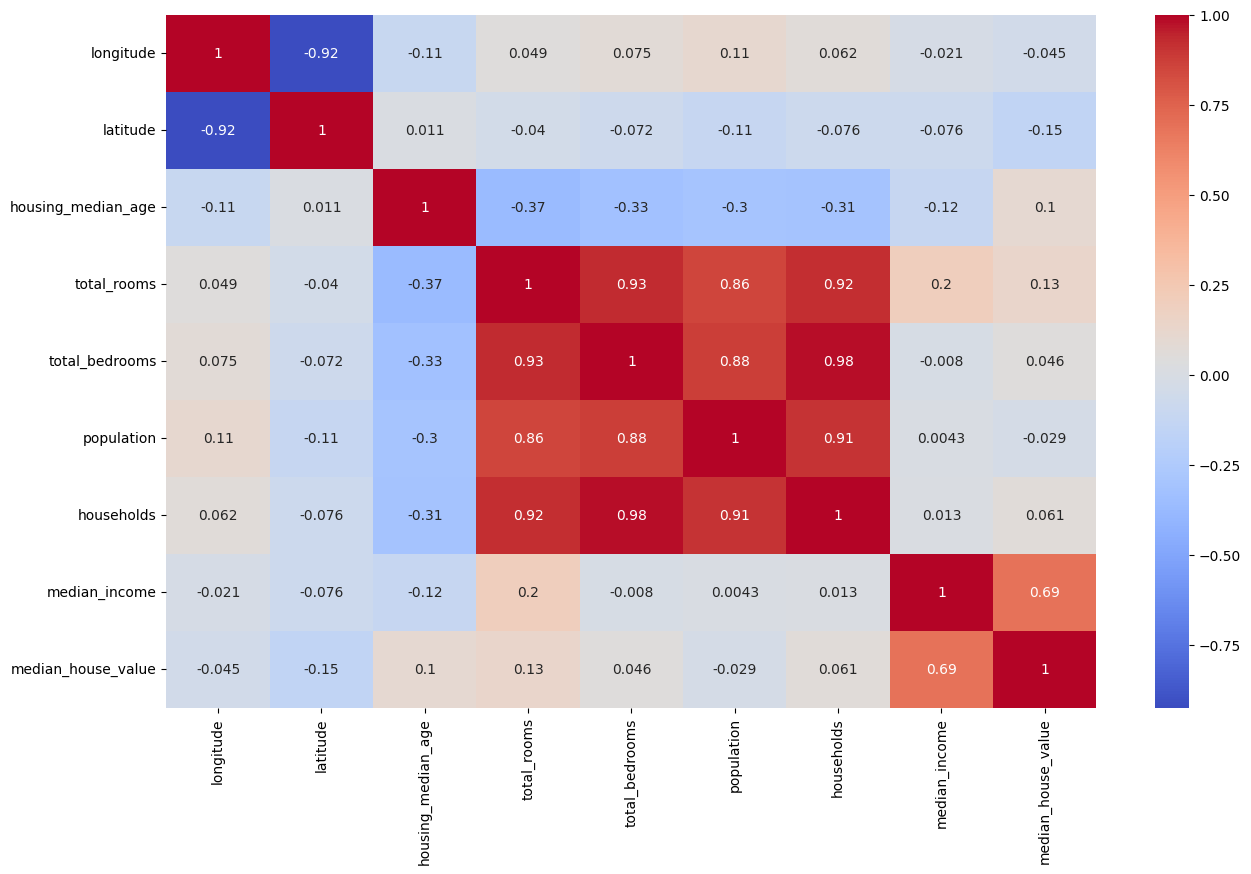

In [109]:
plt.figure(figsize=(15,9))
sns.heatmap(train_data[numerical_columns].corr(),annot=True, cmap="coolwarm")

Based on the heatmap, we can see that the `median_income` is highly correlated with our target `median_house_value`

## Data Preprocessing

#### Normalizing the data
We're using *Log transformatio* for handling the outliers in the dataset.
This makes sure the data is on a uniform scale and comparable to each other.

This helps the gradient descent run faster

In [110]:
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3022,-119.45,35.16,34.0,8.142645,6.546785,7.486613,6.411818,2.3912,INLAND,52900.0
18824,-121.93,41.86,28.0,8.349011,6.728629,7.554335,6.532334,1.7400,INLAND,44000.0
2765,-115.90,32.69,18.0,6.028279,4.465908,4.595120,4.007333,1.5417,INLAND,57500.0
19828,-119.39,36.55,30.0,7.420579,5.752573,6.731018,5.786897,3.3869,INLAND,80400.0
15709,-122.43,37.79,25.0,7.401231,5.978886,6.476972,5.940171,5.0049,NEAR BAY,460000.0
...,...,...,...,...,...,...,...,...,...,...
6979,-118.02,33.97,34.0,7.551712,5.683580,6.788972,5.726848,6.1480,<1H OCEAN,313800.0
11522,-118.08,33.72,14.0,7.611842,5.983936,6.546785,5.908083,7.1673,NEAR OCEAN,340700.0
10873,-117.90,33.73,31.0,7.066467,5.726848,7.433075,5.710427,3.2639,<1H OCEAN,155200.0
20360,-118.94,34.17,16.0,8.228711,6.232448,7.350516,6.115892,6.3303,<1H OCEAN,299400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

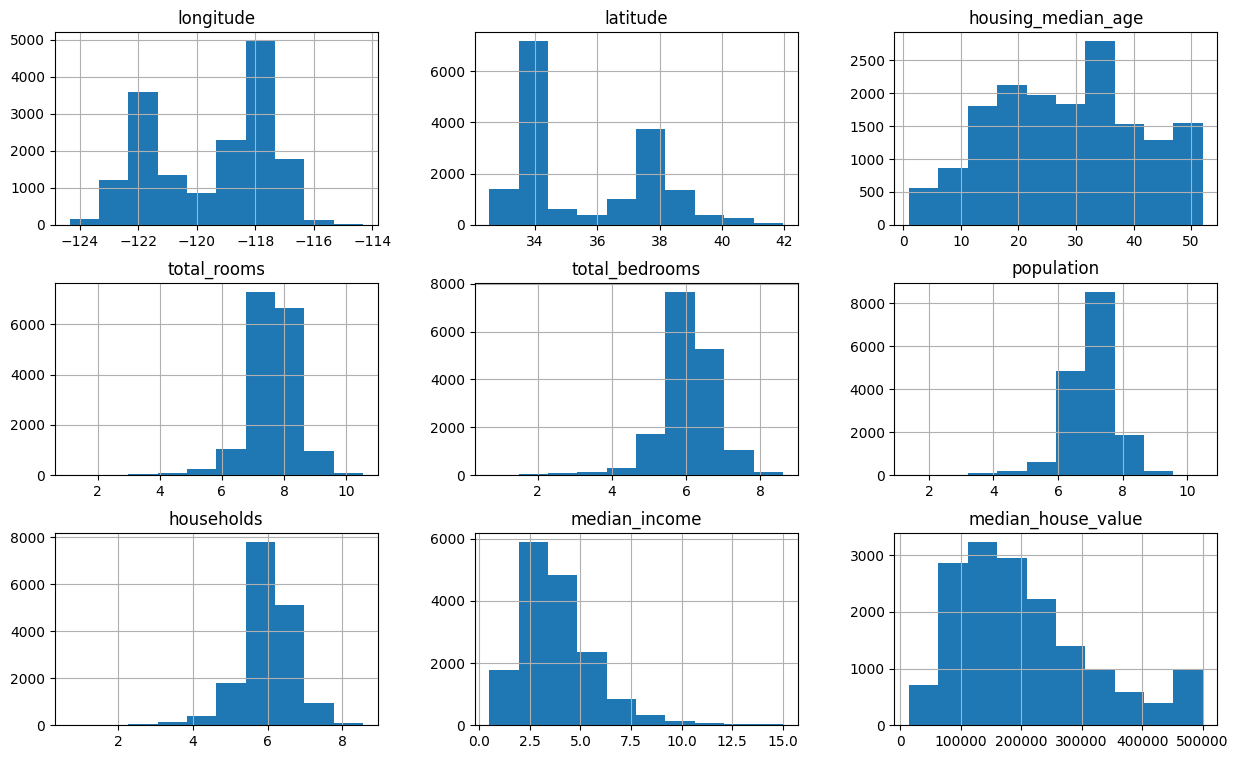

In [111]:
train_data.hist(figsize=(15,9))

In [112]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7212
INLAND        5224
NEAR OCEAN    2100
NEAR BAY      1807
ISLAND           3
Name: count, dtype: int64

Instead of replacing the string values with int values like 1,2,3. We'll create new features representing these options. And let the values 0 and 1 define the value of `ocean_proximity` for those features.

pandas provides a function called `get_dummies`which does exactly that. 
It'll take the column with string values and create subsequent columns of all it's string values.

In [113]:
new_features = pd.get_dummies(train_data.ocean_proximity,dtype=int)

In [114]:
train_data = train_data.join(new_features).drop(["ocean_proximity"],axis=1)

<Axes: >

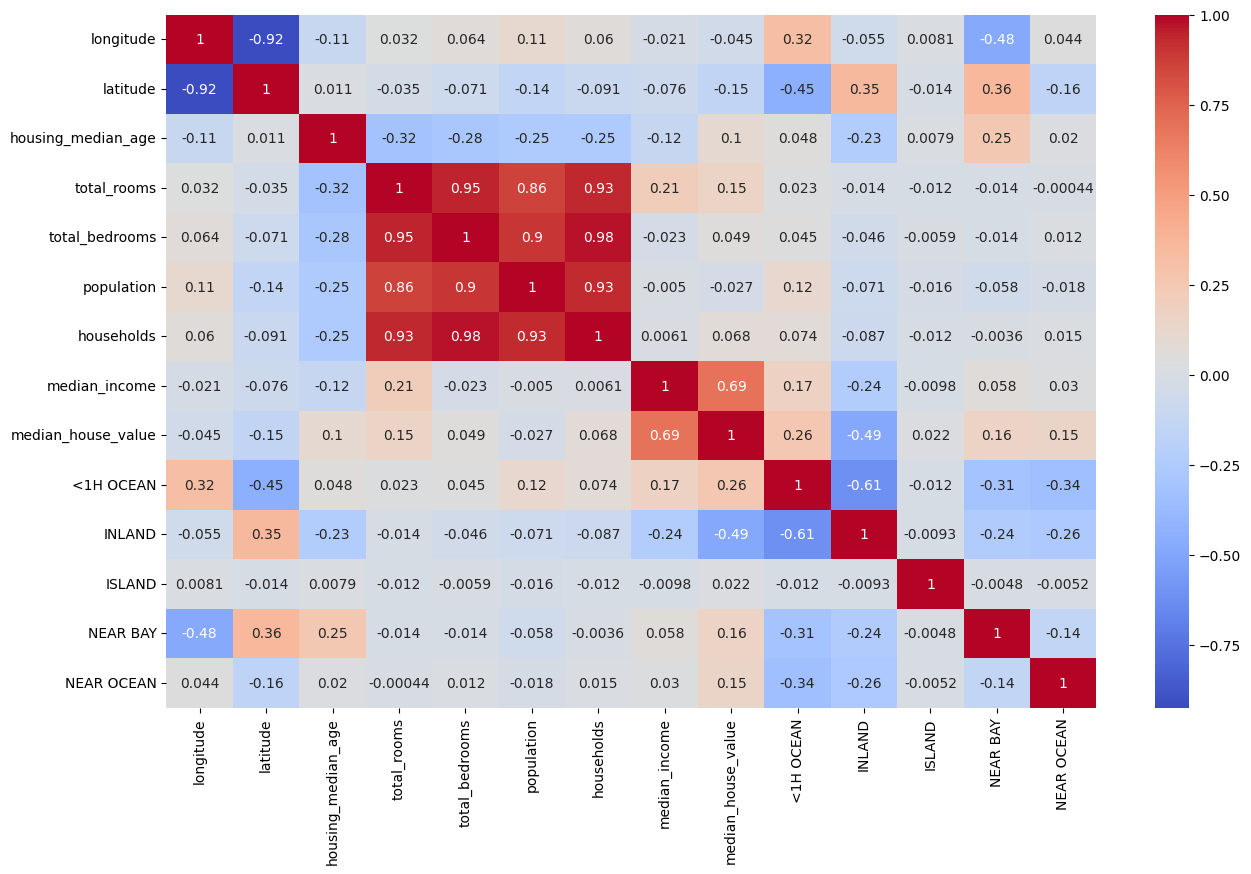

In [115]:
plt.figure(figsize=(15,9))
sns.heatmap(train_data.corr(),annot=True, cmap="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

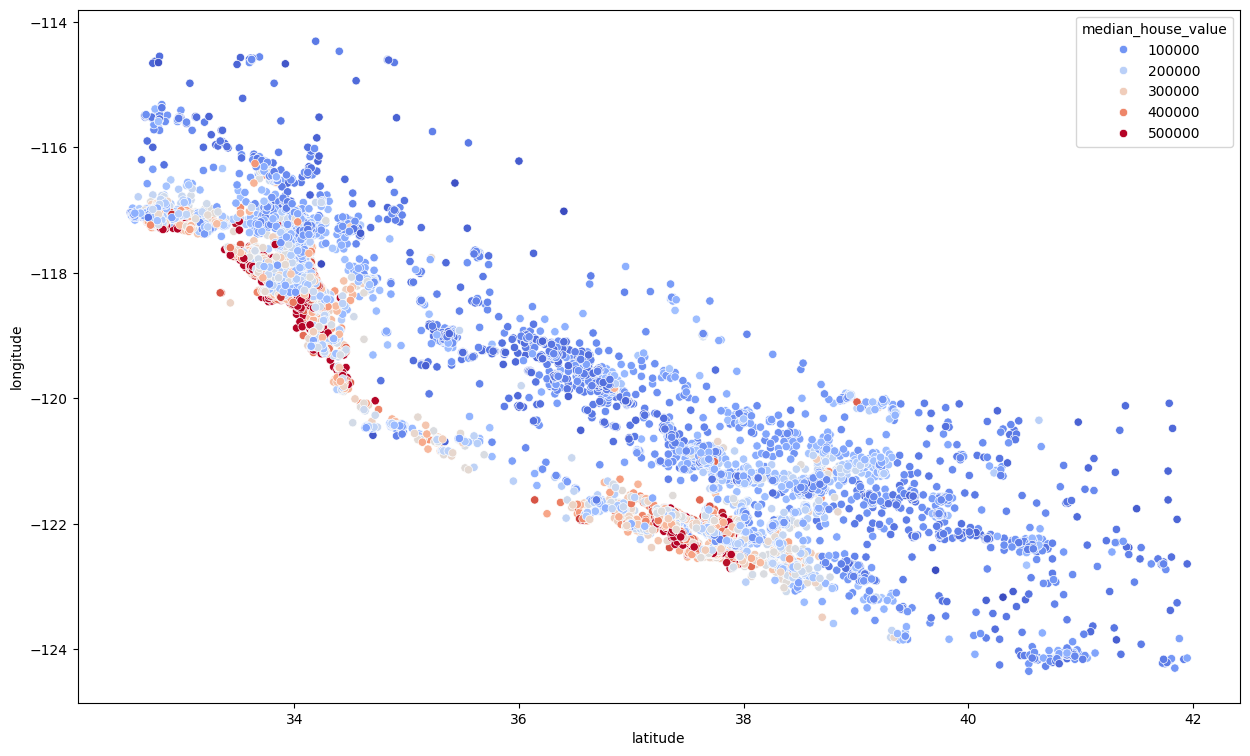

In [116]:
plt.figure(figsize=(15,9))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

This scatterplot maps the entries based on their geopgraphical locations (longitude, latitude). This plot gives us an idea of the houses' locations in California. 

The warm color represent expensive houses. Meaning *Houses near the coast are expensive!*

## Feature Engineering

`total_bedrooms` and `households` have a weak correlation with our target. So, we can engineer these features to provide a better correlation.

In [117]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

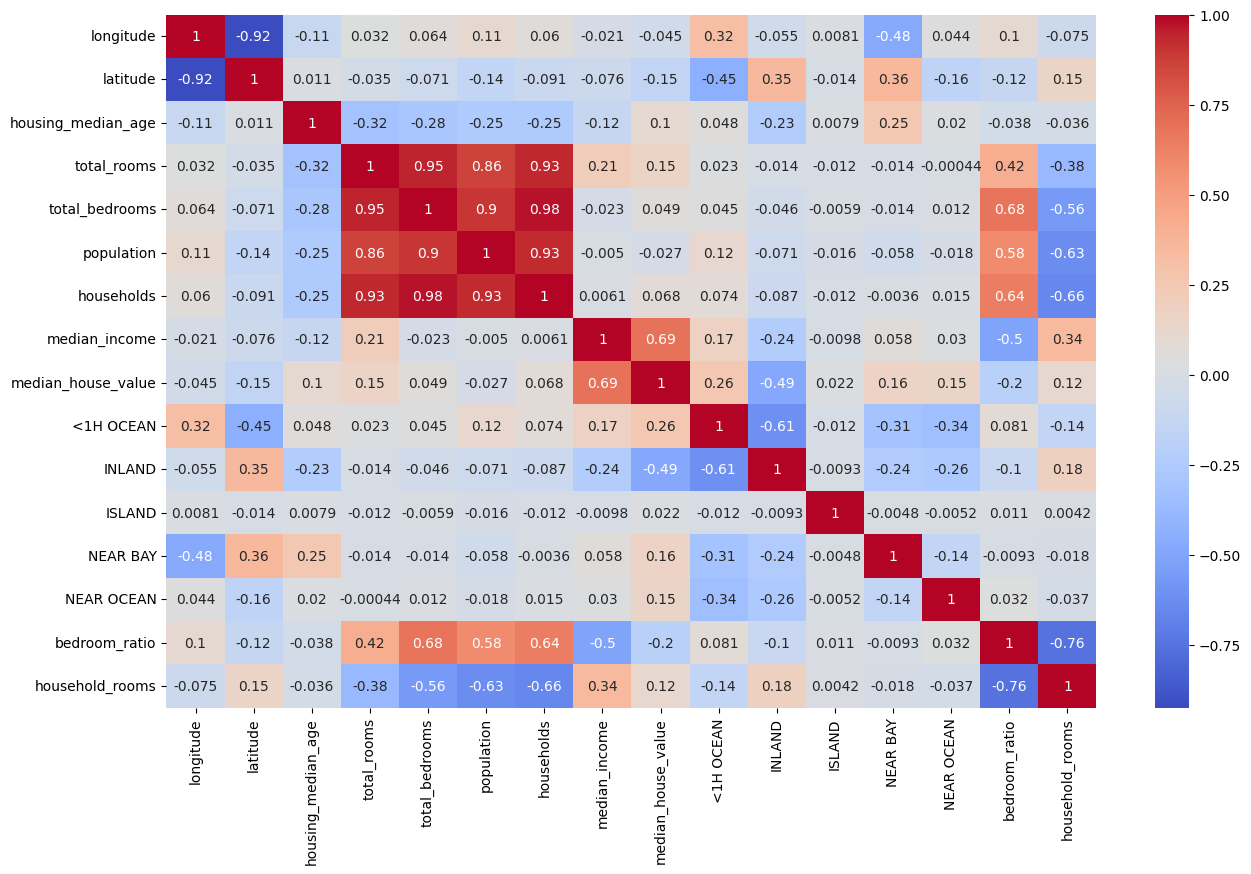

In [118]:
plt.figure(figsize=(15,9))
sns.heatmap(train_data.corr(),annot=True, cmap="coolwarm")